/var/folders/ch/_bz9vy1x62s6hb0snksmrqwm0000gn/T/ipykernel_70881/3458042111.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  goog_data = yf.download('GOOG', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed



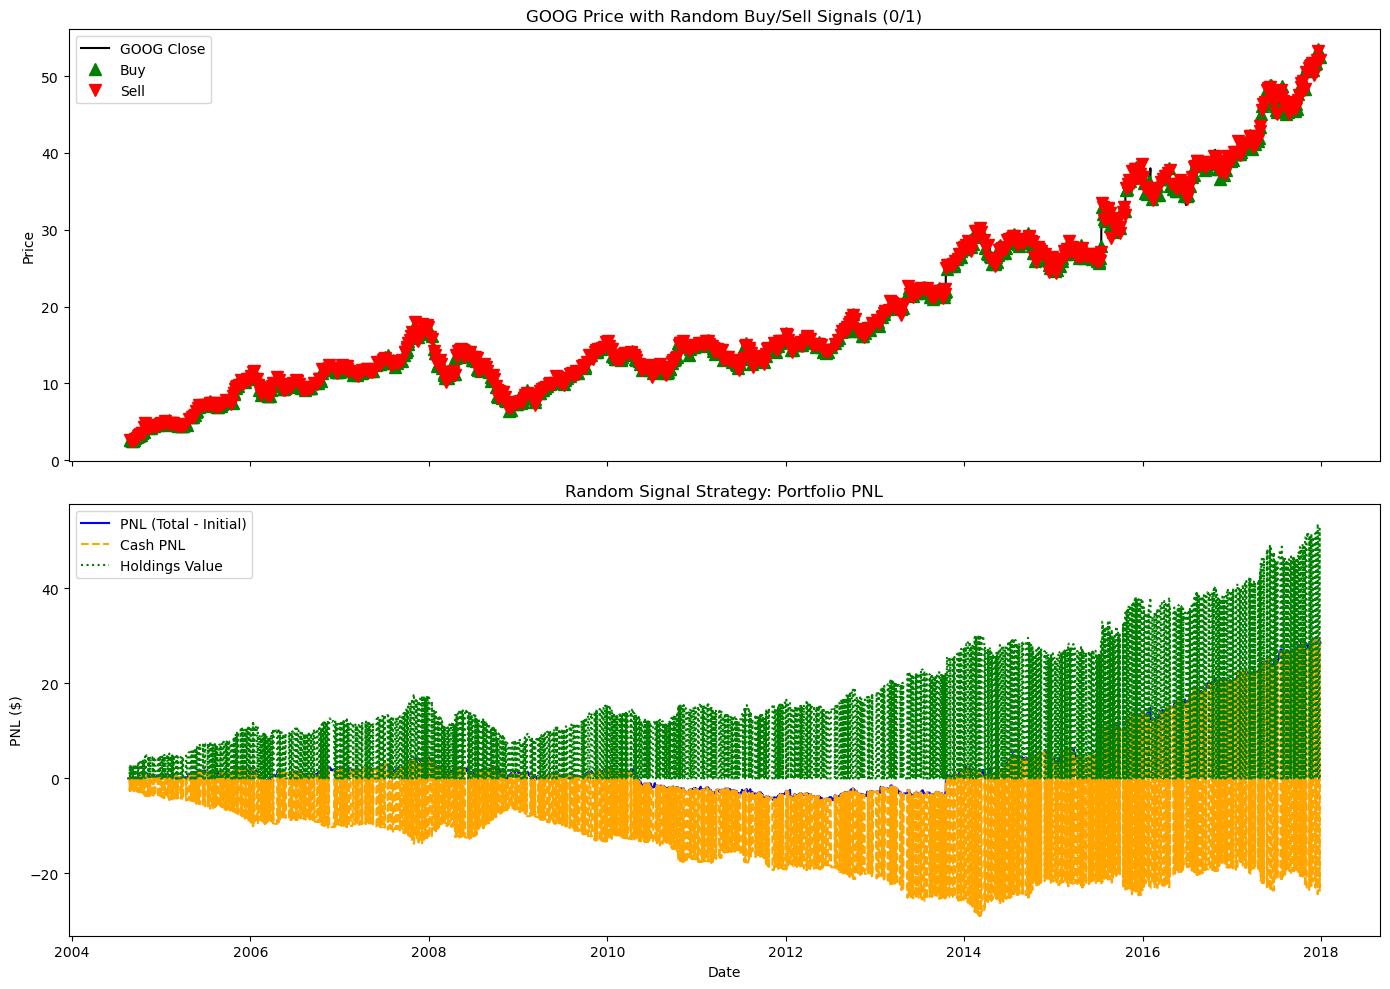

In [21]:
# Random Signal Strategy (0/1 signals)

import pandas as pd
import yfinance as yf
import random
import matplotlib.pyplot as plt

# 1. Fetch GOOG data
start_date = '2001-01-01'
end_date = '2018-01-01'
goog_data = yf.download('GOOG', start=start_date, end=end_date)

# 2. Random signals: only 0 or 1
random.seed(6666)
signals = pd.DataFrame(index=goog_data.index)
signals['signal'] = random.choices([0, 1], k=len(goog_data))

# 3. Portfolio construction
portfolio = signals.copy()
portfolio['price'] = goog_data['Close']
portfolio['orders'] = portfolio['signal'].diff().fillna(portfolio['signal'])
portfolio['positions'] = portfolio['signal']

# 4. Holdings, cash, total
portfolio['holdings'] = portfolio['positions'] * portfolio['price']
initial_capital = 10_000.0
portfolio['trade_cash'] = -(portfolio['orders'] * portfolio['price'])
portfolio['cash'] = initial_capital + portfolio['trade_cash'].cumsum()
portfolio['total'] = portfolio['holdings'] + portfolio['cash']

# 5. Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
ax1.plot(portfolio.index, portfolio['price'], label='GOOG Close', color='black')
ax1.plot(portfolio[portfolio['orders'] == 1].index, portfolio[portfolio['orders'] == 1]['price'], '^', color='g', label='Buy', markersize=8)
ax1.plot(portfolio[portfolio['orders'] == -1].index, portfolio[portfolio['orders'] == -1]['price'], 'v', color='r', label='Sell', markersize=8)
ax1.set_title('GOOG Price with Random Buy/Sell Signals (0/1)')
ax1.set_ylabel('Price')
ax1.legend()
# Plot PNL for better visualization
ax2.plot(portfolio.index, portfolio['total'] - initial_capital, label='PNL (Total - Initial)', color='blue')
ax2.plot(portfolio.index, portfolio['cash'] - initial_capital, label='Cash PNL', color='orange', linestyle='--')
ax2.plot(portfolio.index, portfolio['holdings'], label='Holdings Value', color='green', linestyle=':')
ax2.set_title('Random Signal Strategy: Portfolio PNL')
ax2.set_ylabel('PNL ($)')
ax2.set_xlabel('Date')
ax2.legend()
plt.tight_layout()
plt.show()

random_portfolio = portfolio.copy()

/var/folders/ch/_bz9vy1x62s6hb0snksmrqwm0000gn/T/ipykernel_70881/2668654681.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  goog_data = yf.download('GOOG', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/ch/_bz9vy1x62s6hb0snksmrqwm0000gn/T/ipykernel_70881/2668654681.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensur

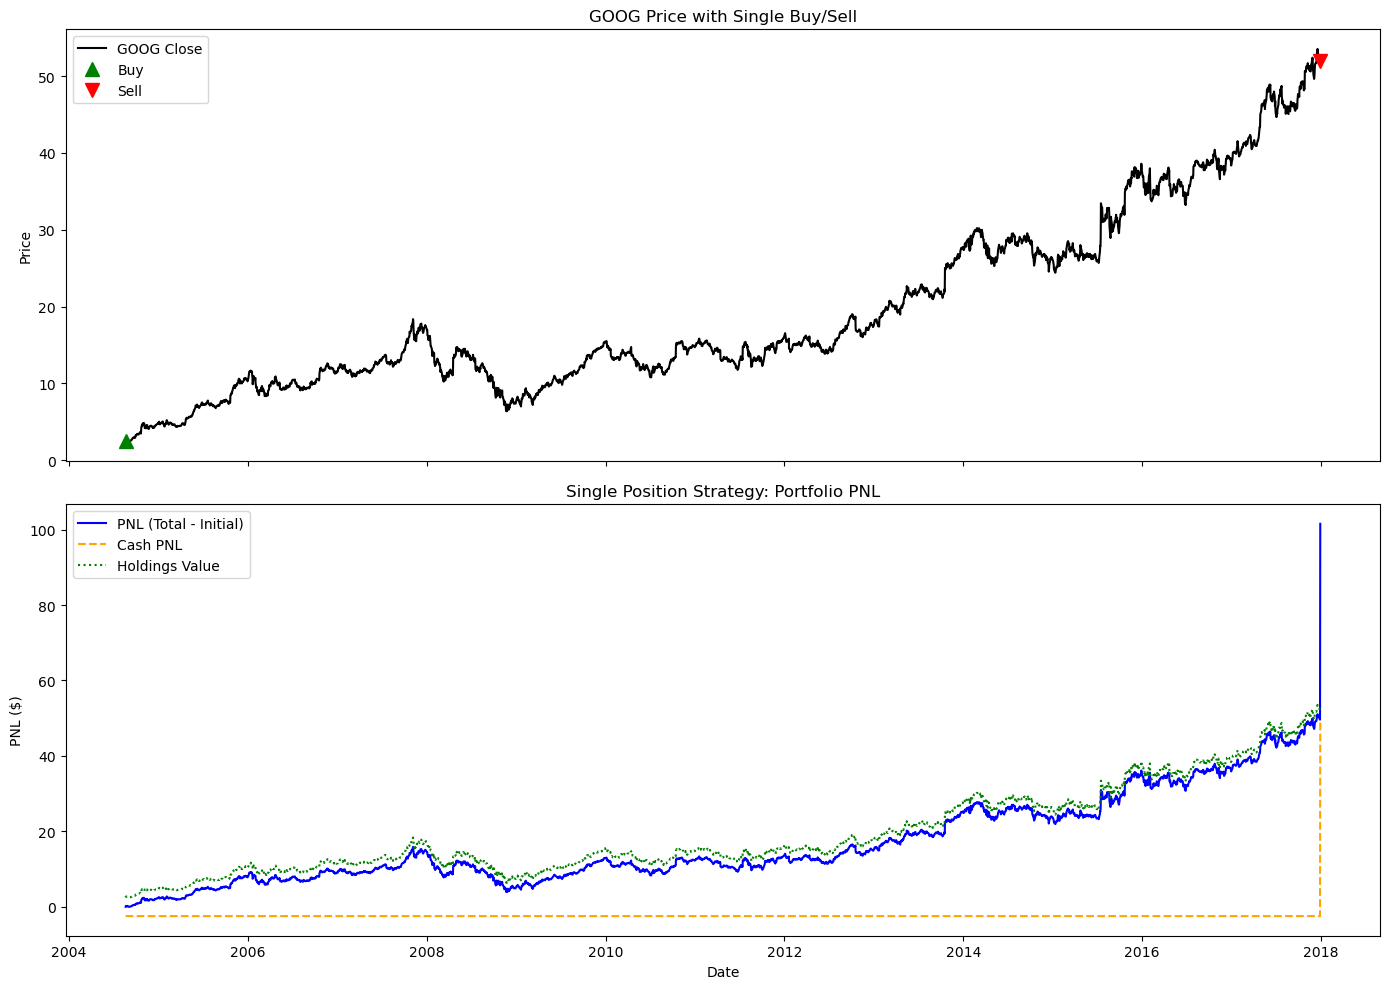

In [22]:
# Single Position Strategy (Buy and Hold 1 Share)

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 1. Fetch GOOG data
start_date = '2001-01-01'
end_date = '2018-01-01'
goog_data = yf.download('GOOG', start=start_date, end=end_date)

# 2. Single position: long 1 share entire period
signals = pd.DataFrame(index=goog_data.index)
signals['signal'] = 1  # always long

portfolio = signals.copy()
portfolio['price'] = goog_data['Close']
portfolio['orders'] = 0
portfolio['orders'].iloc[0] = 1  # buy at start
portfolio['orders'].iloc[-1] = -1  # sell at end
portfolio['positions'] = 1

portfolio['holdings'] = portfolio['positions'] * portfolio['price']
initial_capital = 10_000.0
portfolio['trade_cash'] = -(portfolio['orders'] * portfolio['price'])
portfolio['cash'] = initial_capital + portfolio['trade_cash'].cumsum()
portfolio['total'] = portfolio['holdings'] + portfolio['cash']

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
ax1.plot(portfolio.index, portfolio['price'], label='GOOG Close', color='black')
ax1.plot(portfolio.index[0], portfolio['price'].iloc[0], '^', color='g', label='Buy', markersize=10)
ax1.plot(portfolio.index[-1], portfolio['price'].iloc[-1], 'v', color='r', label='Sell', markersize=10)
ax1.set_title('GOOG Price with Single Buy/Sell')
ax1.set_ylabel('Price')
ax1.legend()
# Plot PNL for better visualization
ax2.plot(portfolio.index, portfolio['total'] - initial_capital, label='PNL (Total - Initial)', color='blue')
ax2.plot(portfolio.index, portfolio['cash'] - initial_capital, label='Cash PNL', color='orange', linestyle='--')
ax2.plot(portfolio.index, portfolio['holdings'], label='Holdings Value', color='green', linestyle=':')
ax2.set_title('Single Position Strategy: Portfolio PNL')
ax2.set_ylabel('PNL ($)')
ax2.set_xlabel('Date')
ax2.legend()
plt.tight_layout()
plt.show()

single_portfolio = portfolio.copy()

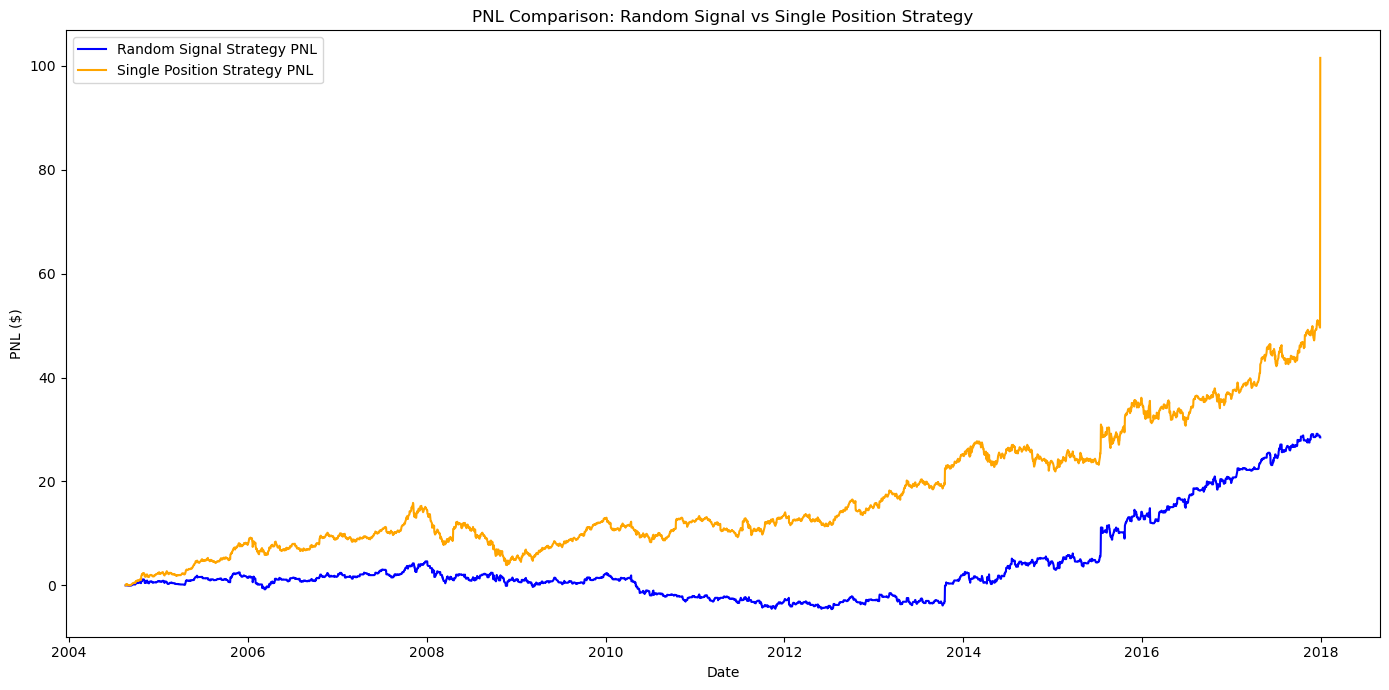

In [23]:
# Comparing the two strategies: PNL (Total - Initial Capital)

import matplotlib.pyplot as plt

# IMPORTANT: After running the random signal strategy cell, add:
# random_portfolio = portfolio.copy()
# After running the single position strategy cell, add:
# single_portfolio = portfolio.copy()
# This ensures both DataFrames are available for plotting.

try:
    random_portfolio
except NameError:
    raise RuntimeError("You must assign random_portfolio = portfolio.copy() after running the random signal strategy cell.")
try:
    single_portfolio
except NameError:
    raise RuntimeError("You must assign single_portfolio = portfolio.copy() after running the single position strategy cell.")

initial_capital = 10_000.0

fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(random_portfolio.index, random_portfolio['total'] - initial_capital, label='Random Signal Strategy PNL', color='blue')
ax.plot(single_portfolio.index, single_portfolio['total'] - initial_capital, label='Single Position Strategy PNL', color='orange')
ax.set_title('PNL Comparison: Random Signal vs Single Position Strategy')
ax.set_ylabel('PNL ($)')
ax.set_xlabel('Date')
ax.legend()
plt.tight_layout()
plt.show()
# Save the plot
fig.savefig('strategy_comparison_pnl.png')

In [24]:
pip install backtesting

244.55s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
